<div class="alert alert-warning"></i><strong>CFT Data Science With R Tutorials</strong><br>By: Seiya David 
 </div>

<div class="alert alert-success"></i><strong><center><h1>Clustering</h1></center></strong>
 </div>


### K-means

Clustering is an unsupervised technique used to discover groups of similar objects close in terms of distance or patterns in a dataset.There are basically two standard clustering techniques: partitioning methods (K-means) and hierarchical clustering. Let us see how these methods are used in R.

**How K-means work?**
> Step 1: Decide the number of clusters (k) and assign k random centers<br>
> Step 2: Assign every data point to the closest cluster based on the distance and compute the mean distance and re-assign new center's location<br>
> Step 3: Repeat step 2 until stable

#### Step 1: Import the data
The data used for this analysis is the a dataset collected on protein consumption for 25 European countries.<br>
**Note: Change the file path to where your dataset is saved.**

In [1]:
# import the dataset
eu_protein_DataSet <- read.csv("D:\\CFT DataScienceHub\\Europenaprotein.csv", header = TRUE)
head(eu_protein_DataSet)

Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4


In [2]:
tail(eu_protein_DataSet)

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
20,Sweden,9.9,7.8,3.5,24.7,7.5,19.5,3.7,1.4,2.0
21,Switzerland,13.1,10.1,3.1,23.8,2.3,25.6,2.8,2.4,4.9
22,UK,17.4,5.7,4.7,20.6,4.3,24.3,4.7,3.4,3.3
23,USSR,9.3,4.6,2.1,16.6,3.0,43.6,6.4,3.4,2.9
24,W Germany,11.4,12.5,4.1,18.8,3.4,18.6,5.2,1.5,3.8
25,Yugoslavia,4.4,5.0,1.2,9.5,0.6,55.9,3.0,5.7,3.2


In [3]:
# display column headers
colnames(eu_protein_DataSet)

[1] "Country"   "RedMeat"   "WhiteMeat" "Eggs"      "Milk"      "Fish"     
 [7] "Cereals"   "Starch"    "Nuts"      "Fr.Veg"

**Note:**
>The dataset has a field with non-numeric(Country) values, this will be excluded from the dataset that would be fed into to the model.

#### Step 2: Remove all non-numeric features and scale.

In [4]:
# remove the Country field, scale and then convert back to data frame
# Note: conversion of dataset to scale requires re-converting that scaled dataset back to data frame
eu_protein_DataSet0 <- as.data.frame(scale(eu_protein_DataSet[, -1]))

# view the dataset
head(eu_protein_DataSet0)

RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0.08126490,-1.7584889,-2.1796385,-1.15573814,-1.20028213,0.9159176,-2.2495772,1.2227536,-1.35040507
-0.27725673,1.6523731,1.2204544,0.39237676,-0.64187467,-0.3870690,-0.4136872,-0.8923886,0.09091397
1.09707621,0.3800675,1.0415022,0.05460623,0.06348211,-0.5146342,0.8714358,-0.4895043,-0.07539207
-0.60590157,-0.5132535,-1.1954011,-1.24018077,-0.90638347,2.2280161,-1.9435955,0.3162641,0.03547862
-0.03824231,0.9485445,-0.1216875,-0.64908235,-0.67126454,0.1869740,0.4430614,-0.9931096,-0.07539207
0.23064892,0.7861225,0.6835976,1.11013912,1.65053488,-0.9428885,0.3206688,-1.1945517,-0.96235764


#### Step 3: Assessing clustering tendency

It is very important to check if a dataset does have clustering tendency so we don't waste our time and effort. We can check for this property by accessing a special type of visualization method.

Warning message:
"package 'seriation' was built under R version 3.5.3"

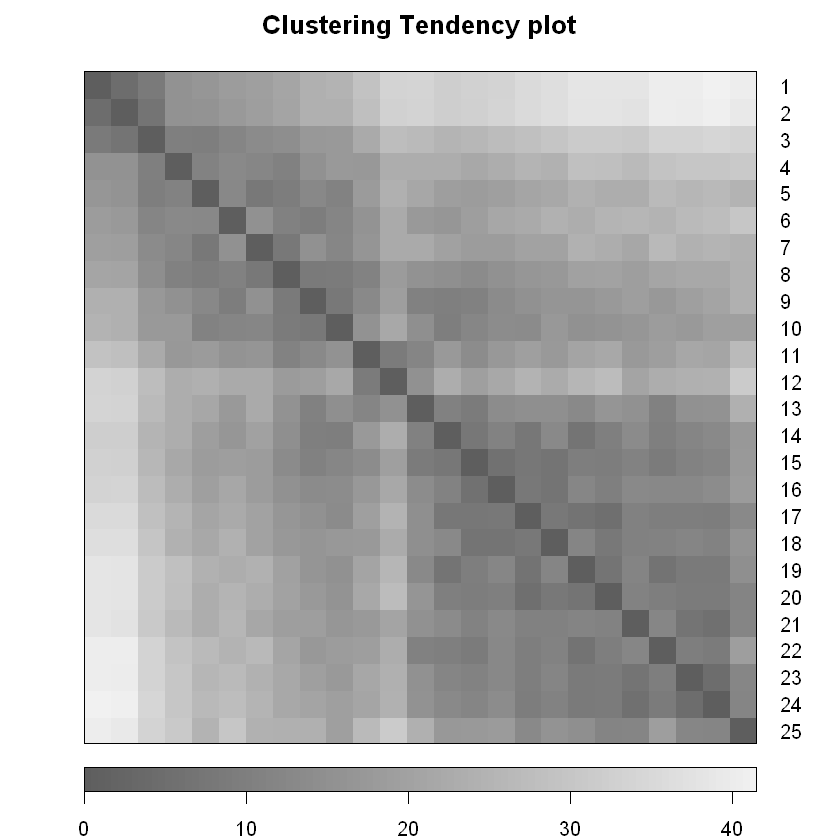

In [5]:
# To use the "seriation" library ensure it is installed already. if not installed
# un-comment and run:
# install.packages("seriation")

# load the seriation package, this packages is required for ploting a dissplot
# which aid in identifying if a dataset does have clustering tendency
library(seriation)

# compute the distance matrix
df <- dist(eu_protein_DataSet[,-1])

# plot the clustering tendency
dissplot(df ,main = "Clustering Tendency plot")

# Plot Analysis: Take a careful look at the plot below, do you see any parttern?
# For me, I see some clear dark block on the bottom right of the plot as well as near the top left.
# This implies there is a clustering tendency, we can continue to use the K-mean. 
# Note: If no parttern(s) was spotted the data set would said to have NO clustering tendency. 

Warning message:
"package 'factoextra' was built under R version 3.5.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.5.2"Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


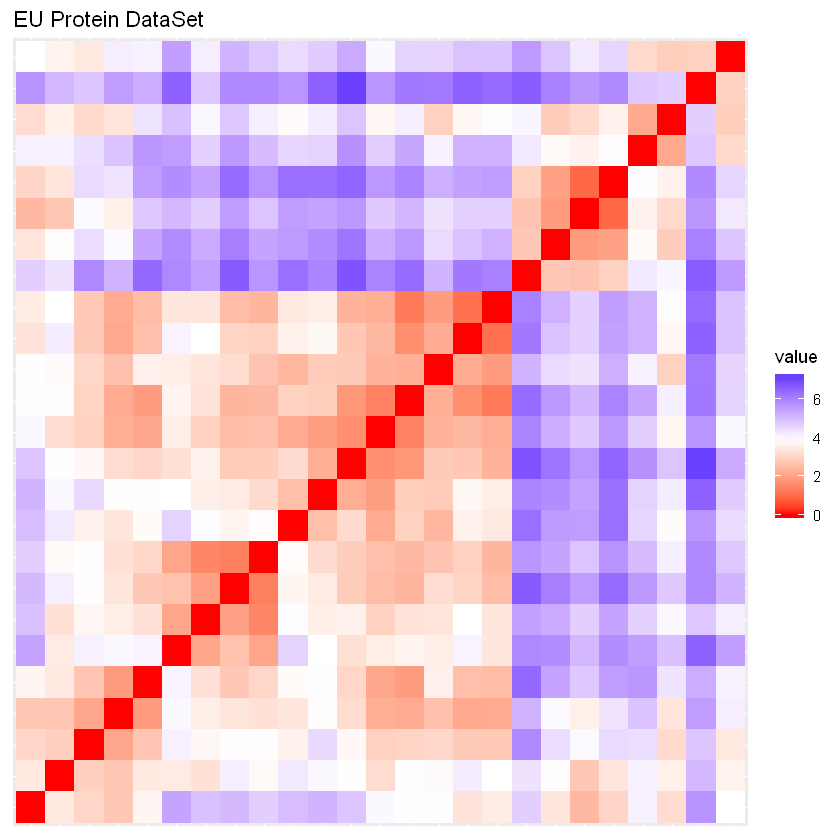

In [6]:
# This is another function to identify clusering tendency, as can be seen there are partterns as well
# To use the "fviz_dist", ensure you have installed the "factoextra" package first and then load it.
library(factoextra)
fviz_dist(dist(eu_protein_DataSet0), show_labels = FALSE) + labs(title = "EU Protein DataSet")

For the visual assessment of clustering tendency, we start by computing the dissimilarity matrix between observations using the function dist(). Next the function fviz_dist() is used to display the dissimilarity matrix.The color level is proportional to the value of the dissimilarity between observations: pure red if dist(xi,xj)=0 and pure blue if dist(xi,xj)=1. Objects belonging to the same cluster are displayed in consecutive order.

#### Step 4: Build the K-means cluster

In [17]:
## To get the exact results as me, please set the seed
set.seed(101)

# K-mean does have several libraries in which it is implemented but for this case 
# we will go with the default package which load ALWAYS when we fire up R/Rstudio. This packages is called the
# the stats packages and since it's already loaded we do not require to load it again to use the K-mean() function
# Note: It is very important to ALWAYS scale

# scale simply will calculate the mean and standard deviation of the entire vector, then "scale" each element by those values
# by subtracting the mean and dividing by the sd.

# The centers argument tells the algorithm to set k as 7 in this case. But is k =7 the optimal value?
eu_group_protein <- kmeans(eu_protein_DataSet0, centers=2)

# order the clusters
order_cluster <- order(eu_group_protein$cluster)

# attach the countries from the original dataset to the clusters
data.frame(eu_protein_DataSet$Country[order_cluster],eu_group_protein$cluster[order_cluster])

eu_protein_DataSet.Country.order_cluster.,eu_group_protein.cluster.order_cluster.
Albania,1
Bulgaria,1
Greece,1
Hungary,1
Italy,1
Portugal,1
Romania,1
Spain,1
USSR,1
Yugoslavia,1


In [20]:
# we could also write a for loop to classify the countries by cluster
for (i in 1:2){
     print(paste("Countries in Cluster ",i))
     print(eu_protein_DataSet$Country[eu_group_protein$cluster == i])
     print (" ")
}

[1] "Countries in Cluster  1"
 [1] Albania    Bulgaria   Greece     Hungary    Italy      Portugal  
 [7] Romania    Spain      USSR       Yugoslavia
25 Levels: Albania Austria Belgium Bulgaria Czechoslovakia ... Yugoslavia
[1] " "
[1] "Countries in Cluster  2"
 [1] Austria        Belgium        Czechoslovakia Denmark        E Germany     
 [6] Finland        France         Ireland        Netherlands    Norway        
[11] Poland         Sweden         Switzerland    UK             W Germany     
25 Levels: Albania Austria Belgium Bulgaria Czechoslovakia ... Yugoslavia
[1] " "


Warning message:
"argument frame is deprecated; please use ellipse instead."Warning message:
"argument frame.type is deprecated; please use ellipse.type instead."

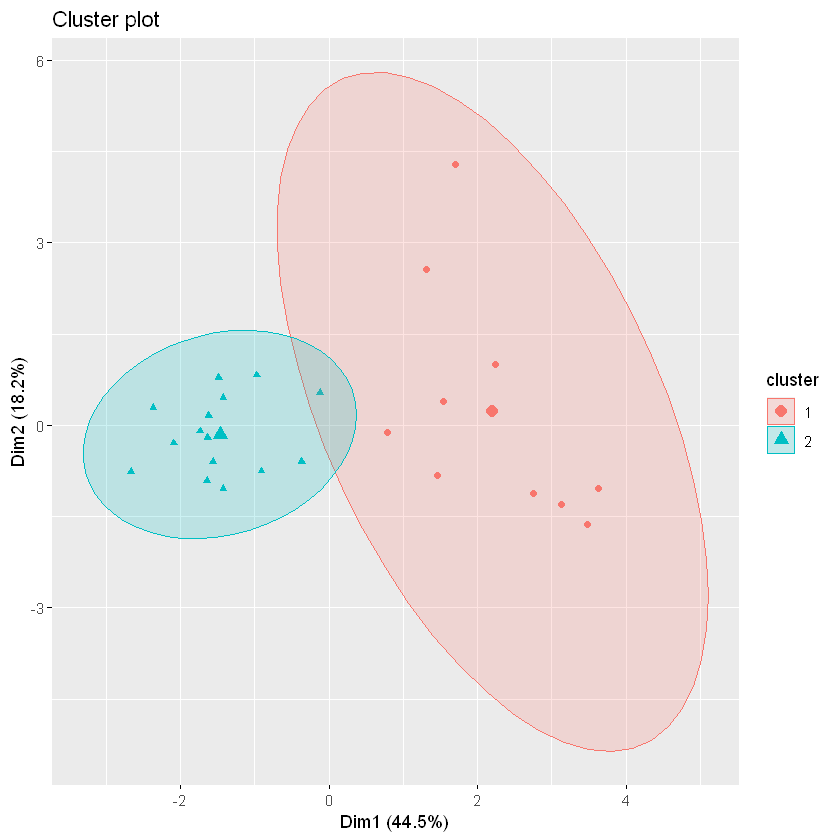

In [21]:
# Visualize k-means clusters
library(factoextra)

fviz_cluster(eu_group_protein, data = eu_protein_DataSet0, geom = "point",
                                         stand = FALSE, frame.type = "norm")

#### Determining the Optimal number of clusters

We will now describe the two very popular methods for determing the optimal value of k.<br><br>
**Elbow method:**<br>

The steps to obtain an optimal number of k using the elbow method is defined as follows:<br>

* Compute clustering algorithm for different values of k by varying k from 1 to 10 clusters<br> 
* For each k, calculate the total within-cluster sum of square (wss)<br>
* Plot the curve of wss according to the number of clusters k.<br>
* The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

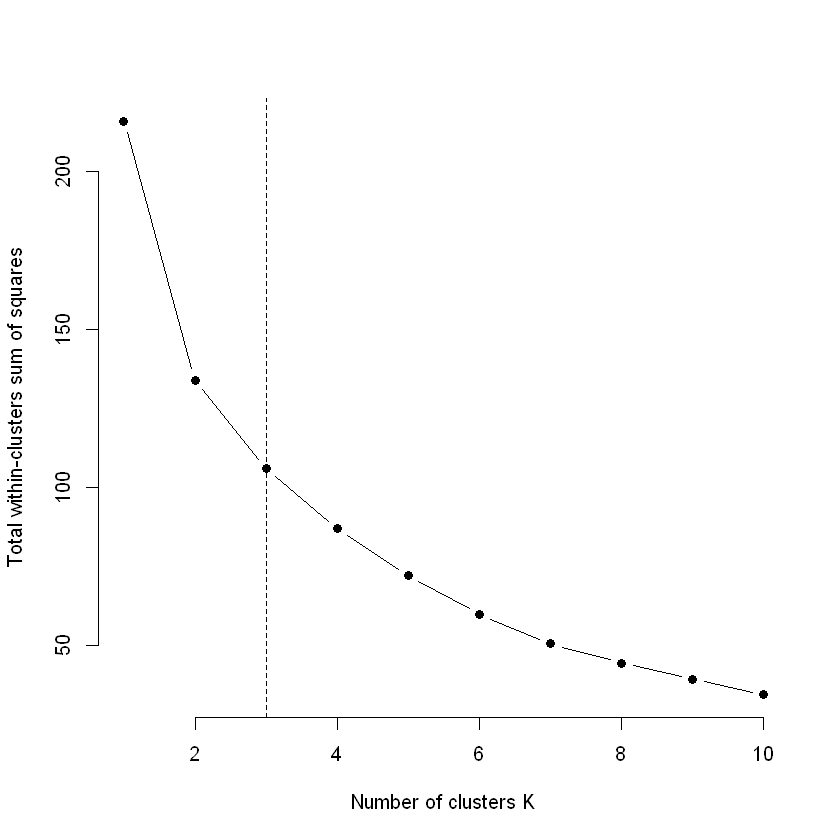

In [11]:
set.seed(123)
# Compute and plot wss for k = 2 to k = 10

# Maximal number of clusters
k.max <- 10 

# The scaled dataset
data <- eu_protein_DataSet0

# compute the within-cluster sum of square
wss <- sapply(1:k.max , function(k){kmeans(data, k, nstart=10 )$tot.withinss})

# plot the number clusters against the within-cluster sum of square
plot(1:k.max, wss,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

# from the plot, the elbow is identified on the 3 cluster, to highlight this point
# we add the code below, I would strongly suggest you comment the code below and see what it gives then
# then un-comment again and re-run
abline(v = 3, lty =2)

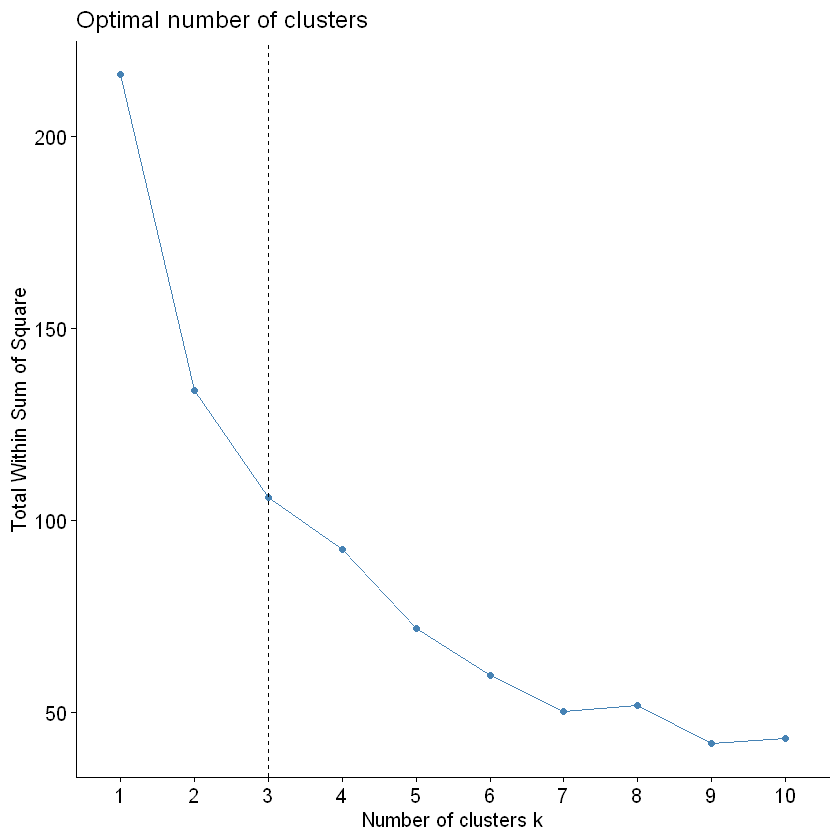

In [12]:
# A very similar plot can also be derived using the code below and setting the xintercept = 3)
library(cluster)
fviz_nbclust(eu_protein_DataSet0, kmeans, method = "wss") + geom_vline(xintercept = 3, linetype = 2)

#### silhouette Plot

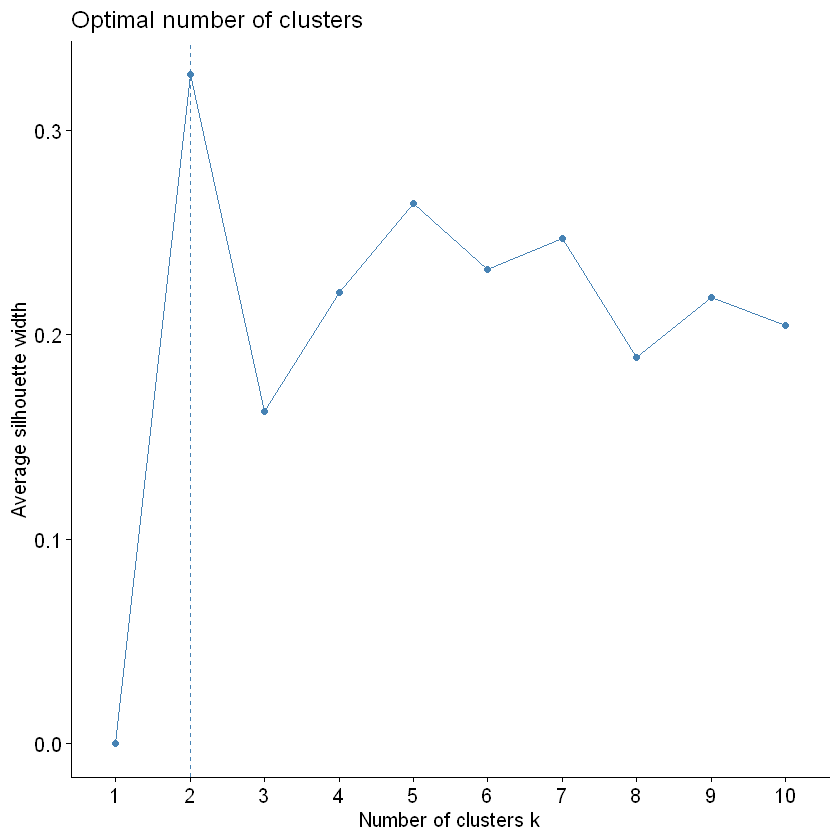

In [13]:
library(cluster)

# This plot automatically indicates with a dashed vertical line the value of the optimal value of k
fviz_nbclust(eu_protein_DataSet0, kmeans, method = "silhouette")

# Observe we do have two contradicting optimal values of k from the elbow and silhouette methods, to resolve this, 
# we would go with the output of a third method called gap statistic.

#### Gap Statistics

In [15]:
# To compute the gap statistic, we would need to install the cluster package if this has not been installed already and 
# then load it.
library(cluster)

# set seed for REPRODUCIBILITY
set.seed(101)

# Run the gap statistics, I did not go into details of the function here, but it's very clear what most of the arguments are.
# I would strongly suggest you give the "clusGap" documentation a read.
gap_stat <- clusGap(eu_protein_DataSet0, FUN = kmeans, nstart = 25,K.max = 10, B = 10000)

# Print the result
print(gap_stat, method = "firstmax")

Clustering Gap statistic ["clusGap"] from call:
clusGap(x = eu_protein_DataSet0, FUNcluster = kmeans, K.max = 10,     B = 10000, nstart = 25)
B=10000 simulated reference sets, k = 1..10; spaceH0="scaledPCA"
 --> Number of clusters (method 'firstmax'): 2
          logW   E.logW        gap     SE.sim
 [1,] 3.187215 3.254973 0.06775736 0.04382928
 [2,] 2.928123 3.051665 0.12354203 0.04285696
 [3,] 2.799138 2.903041 0.10390283 0.04162286
 [4,] 2.664614 2.785947 0.12133262 0.04176141
 [5,] 2.547382 2.682964 0.13558216 0.04281879
 [6,] 2.440754 2.585965 0.14521187 0.04407601
 [7,] 2.332631 2.492110 0.15947939 0.04548878
 [8,] 2.238304 2.399154 0.16084929 0.04693277
 [9,] 2.143673 2.305675 0.16200197 0.04855425
[10,] 2.038397 2.210562 0.17216575 0.05031295


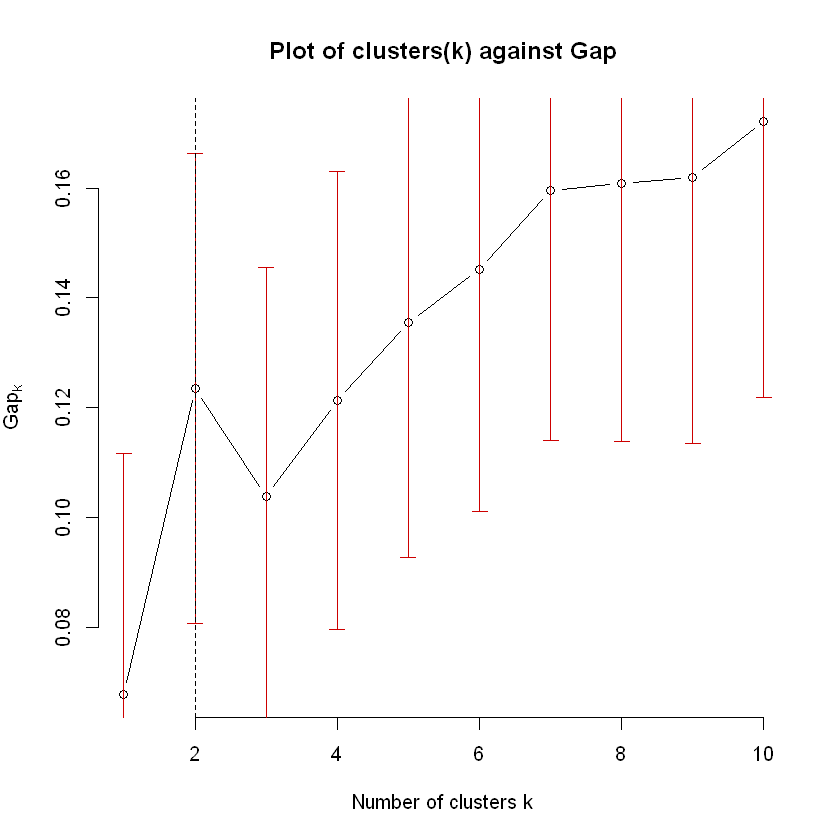

In [16]:
# The first maximum point before the drop is chosen as the optimal value of k
plot(gap_stat, frame = F, main = "Plot of clusters(k) against Gap",xlab = "Number of clusters k")
abline(v = 2, lty = 2)

There two types of Hierarchical clustering **Agglomerative(bottom-up)** and **Divisive(top-down)**<br><br>
**Agglomerative**<br>
>Starting with each item in its own cluster, find the best pair to merge into new cluster, repeat untill all clusters are fused together<br><br>

**Divisive**
>Staring with all the data in a single cluster, consider every possible way to divide the cluster into two, choose the best division and recursively operate on both sides.

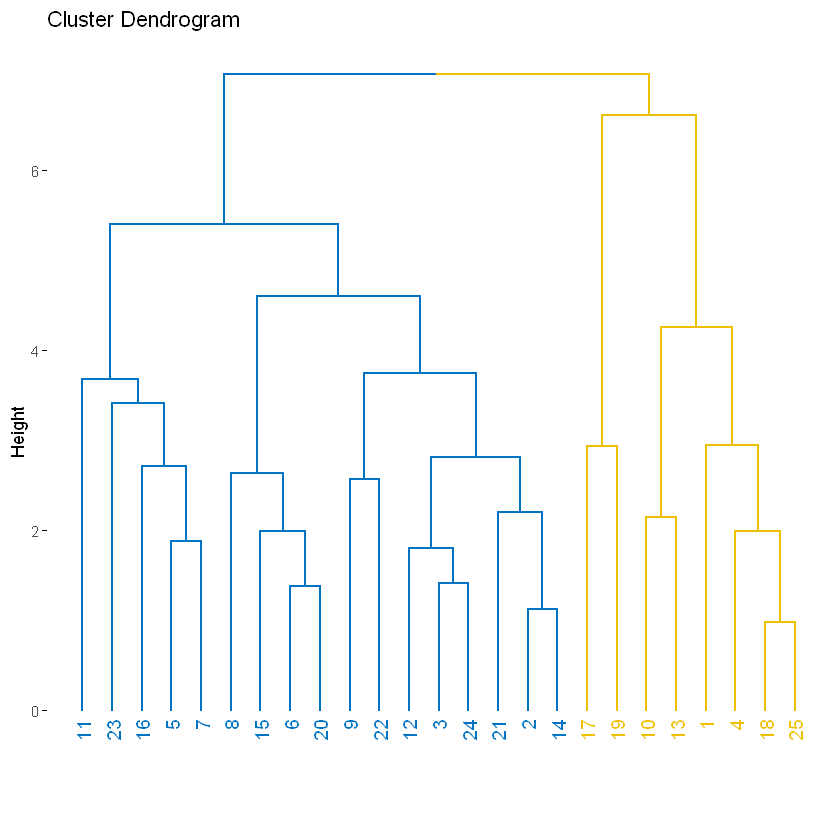

In [23]:
# Hierarchical clustering
fviz_dend(hclust(dist(eu_protein_DataSet0)), k = 2, k_colors = "jco", as.ggplot = TRUE, show_labels = T)

#### Note: Haven obtained an optimal value of k, this new value should now be used to build both the K-means as well as the Hierarchical clustering by replacing the 7 used with 2.

# PCA

PCA is a dimensionality reduction technique that transforms m-dimensional input space to n-dimensional (n < m) output space, with the objective to minimize the amount of information/variance lost by discarding (m - n) dimension. If we have a very large dataset, the probability of have multicollinearity is high, to eliminate this, we would reduce the number of features or dmensions to the data core Principl Components.

In [24]:
# I will now demonstrate this concept with a small dataset
# Load the iris dataset
data(iris)

# assign the dataset to an object
raw_data <- iris

# view the first six records of the dataset
head(raw_data)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [25]:
# View the structure of the dataset
str(raw_data)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [26]:
# View the summary statistics of the dataset
summary(raw_data)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [27]:
# To see how correlated the features are, we compute the correlation of the dataset
# The -5 implies remove column 5 from the computation since it is not a numerical variable
correlation_data <- cor(raw_data[,-5])

Warning message:
"package 'corrplot' was built under R version 3.5.2"corrplot 0.84 loaded


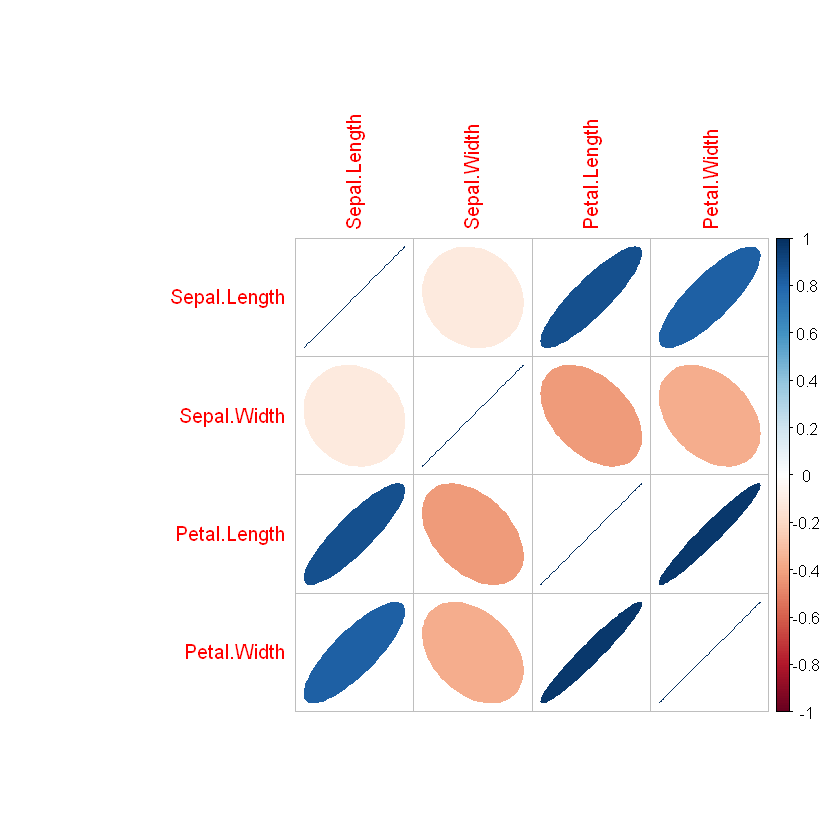

In [28]:
# load the corrplot package, if you get an error, it could imply you need to install the package 
library(corrplot)

# plot the correlation plot, what do you think of some features?
corrplot(correlation_data, method = "ellipse")

In [29]:
# Though I did not go into details of the mathematical concept of PCA here, I would recommend you run the help function
# against the prcomp() function for it's documentaion.
pac_iris <- prcomp(raw_data[,-5], scale. = T)
pac_iris

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

In [30]:
# Note: to view the attributes of any object run the code below.
attributes(pac_iris)

$names
[1] "sdev"     "rotation" "center"   "scale"    "x"       

$class
[1] "prcomp"

In [31]:
# PC1 explains the maximum variability, followed by PC2, etc.
summary(pac_iris)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7084 0.9560 0.38309 0.14393
Proportion of Variance 0.7296 0.2285 0.03669 0.00518
Cumulative Proportion  0.7296 0.9581 0.99482 1.00000

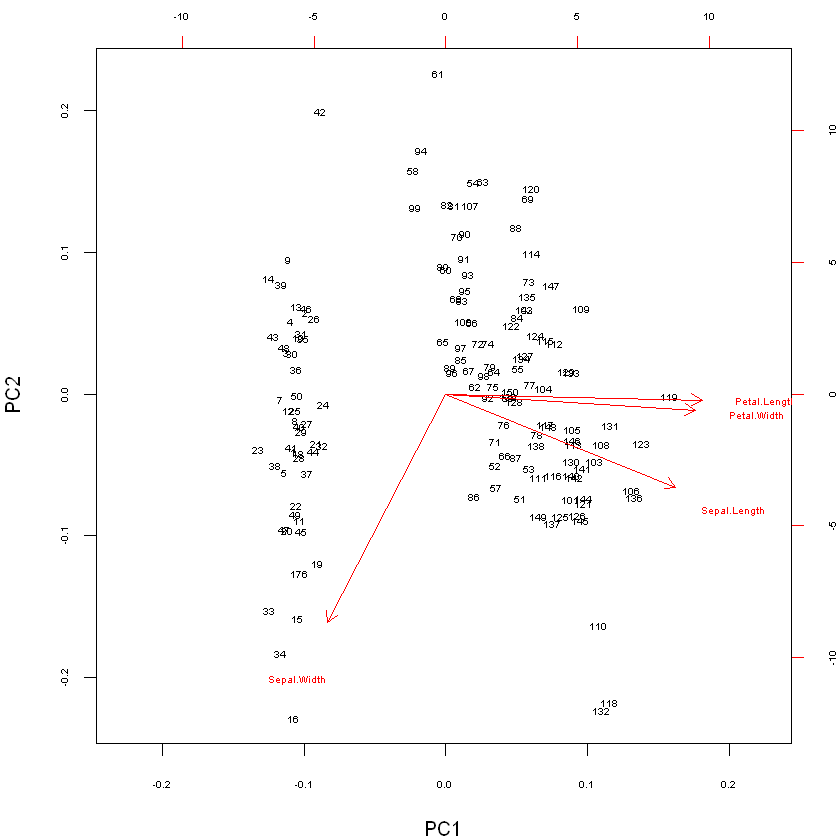

In [32]:
# let plot a biplot, the numbers on the plot are the row numbers of the dataset and we can observe 
# that petal length and petal width are very similar based on how close they are and their direction on the plot.
par(mar=c(4,4,2,2))
biplot(pac_iris, cex=0.5, cex.axis=0.5)

In [33]:
# Predict the the dataset
full_pca_dataset_v1 <- predict(pac_iris, raw_data[,-5])

In [34]:
# convert the above object to a data frame and attach the response field
full_pca_dataset_v2 <- data.frame(full_pca_dataset_v1, raw_data[5])

In [35]:
# view the new dataset
head(full_pca_dataset_v2)

PC1,PC2,PC3,PC4,Species
-2.257141,-0.4784238,0.12727962,0.024087508,setosa
-2.074013,0.6718827,0.23382552,0.102662845,setosa
-2.356335,0.3407664,-0.04405390,0.028282305,setosa
-2.291707,0.5953999,-0.09098530,-0.065735340,setosa
-2.381863,-0.6446757,-0.01568565,-0.035802870,setosa
-2.068701,-1.4842053,-0.02687825,0.006586116,setosa


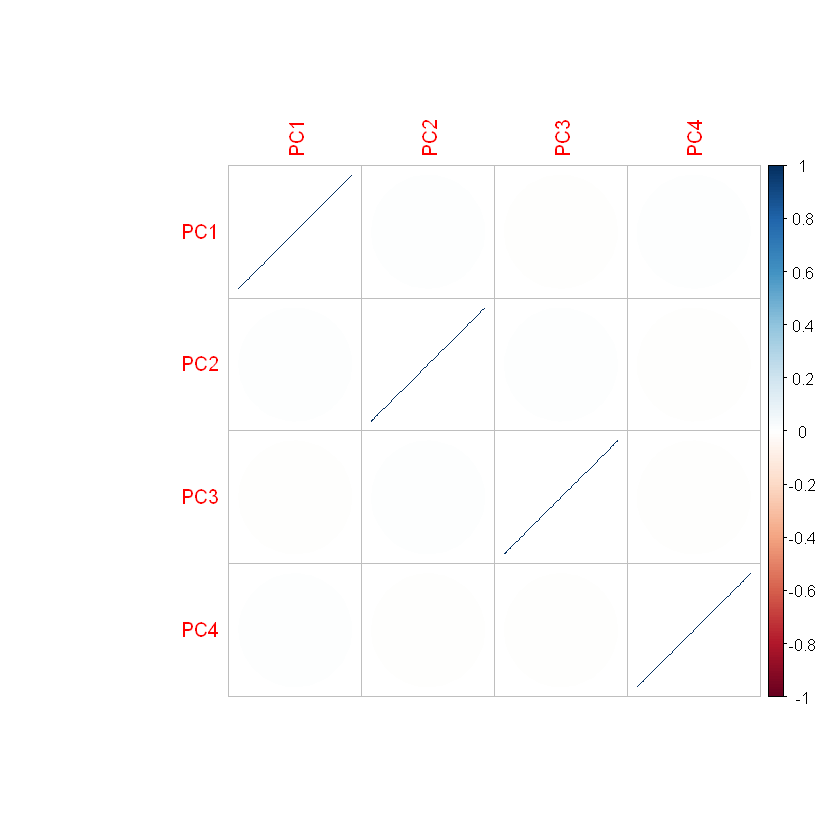

In [36]:
# To be sure that NO features are correlated, run the code below.
x <- cor(full_pca_dataset_v2[,-5])
corrplot(x, method = "ellipse")
# Yes! PCA has been applied.

<div class="alert alert-success"></i><strong><center><h1>The End</h1></center></strong>
 </div>